[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/MCMC_by_python.ipynb)

In [9]:
import numpy as np
from matplotlib import pyplot as plt
N=100000
x=np.random.uniform(-1.0,1.0,N)
y=np.random.uniform(-1.0,1.0,N)
    

In [12]:
l=[]
for i in range(N):
  if (x[i]**2+y[i]**2)<1.0:
    l.append(True)
  else:
    l.append(False)
print(2.0**2*float(l.count(True))/float(N))
     

3.1474


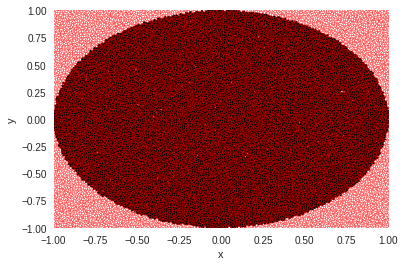

In [14]:
plt.scatter(x,y,c=l,s=5,edgecolor='Red')
plt.xlim(-1.0,1.0)
plt.ylim(-1.0,1.0)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

1 Dim
Theoretical Value: 1.9999999999999998
Monte Carlo; 2.0
2 Dim
Theoretical Value: 3.141592653589793
Monte Carlo; 3.13892
3 Dim
Theoretical Value: 4.1887902047863905
Monte Carlo; 4.18768
4 Dim
Theoretical Value: 4.934802200544679
Monte Carlo; 4.91872
5 Dim
Theoretical Value: 5.263789013914325
Monte Carlo; 5.33152
6 Dim
Theoretical Value: 5.167712780049969
Monte Carlo; 5.21024
7 Dim
Theoretical Value: 4.7247659703314016
Monte Carlo; 4.76032
8 Dim
Theoretical Value: 4.058712126416768
Monte Carlo; 4.16
9 Dim
Theoretical Value: 3.2985089027387064
Monte Carlo; 3.11296
10 Dim
Theoretical Value: 2.550164039877345
Monte Carlo; 2.57024
11 Dim
Theoretical Value: 1.8841038793898994
Monte Carlo; 1.61792
12 Dim
Theoretical Value: 1.3352627688545893
Monte Carlo; 1.2288
13 Dim
Theoretical Value: 0.910628754783283
Monte Carlo; 0.57344
14 Dim
Theoretical Value: 0.5992645293207919
Monte Carlo; 0.32768
15 Dim
Theoretical Value: 0.38144328082330436
Monte Carlo; 0.65536
16 Dim
Theoretical Value: 0.23533

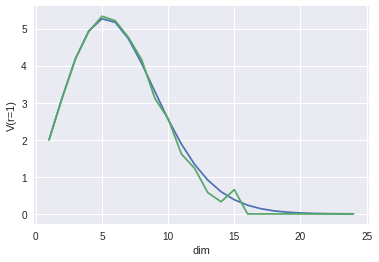

In [17]:
import math
import numpy as np
from matplotlib import pyplot as plt

def V(n):
  return math.pi**(n/2.0)/math.gamma(n/2.0+1.0)
def count_point(n):
  x=[]
  count=0
  for i in range(n):
    x.append(np.random.uniform(-1.0,1.0,N))
  for i in range(N):
    r=0.0
    for j in range(n):
      r+=x[j][i]**2.0
    if r<1.0:
      count+=1
  return count
tv=[]
mc=[]
N=100000
for n in range(1,25):
  c=count_point(n)
  tv.append(V(n))
  mc.append(2.0**n*float(c)/float(N))
  print(n,'Dim')
  print('Theoretical Value:',V(n))
  print('Monte Carlo;',2.0**n*float(c)/float(N))
x=np.arange(1,25,1)
plt.plot(x,tv)
plt.plot(x,mc)
plt.xlabel('dim')
plt.ylabel('V(r=1)')
plt.grid(True)
plt.show()

In [19]:
import random

inner = 0
for i in range(10000):
    x, y = random.random(), random.random()
    if x**2 + y**2 < 1:
        inner += 1
print(inner *4 / 10000)   # 3.1446
np.random.seed(1)               # 乱数の初期化。好みの数で。
arr = np.random.rand(2, 10000)  # 2行10000列の乱数ndarray
distance = (arr**2).sum(axis=0) # 全要素を2乗し縦に合計すると原点からの距離
count = (distance < 1).sum()    # 距離が1未満か判断しTrueの個数を調べる
print(4 * count / 10000)        # 3.1348

3.1272
3.1348


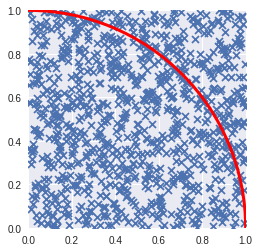

In [20]:
import numpy as np
import matplotlib.pyplot as plt

c1 = plt.Circle((0, 0), radius=1, fc="None", ec="r", linewidth=3)
ax = plt.gca()
ax.add_patch(c1)

plt.axis("scaled")
plt.xlim(0, 1)
plt.ylim(0, 1)

x = np.random.rand(1000)
y = np.random.rand(1000)
plt.scatter(x, y, marker="x")
plt.show()

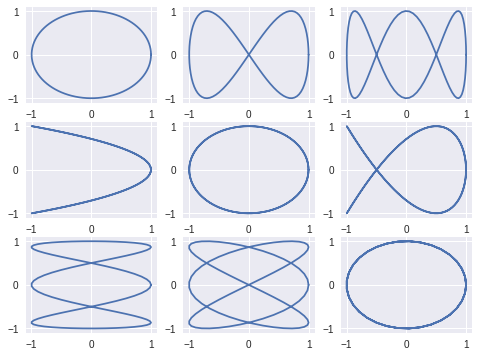

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# 3x3の9個のサブプロットに分割
fig, axs = plt.subplots(3, 3, figsize=(8, 6))

t = np.linspace(0, np.pi*2, 100)
for i in range(3):
    for j in range(3):
        axs[i, j].plot(np.cos(t*(i+1)), np.sin(t*(j+1)))

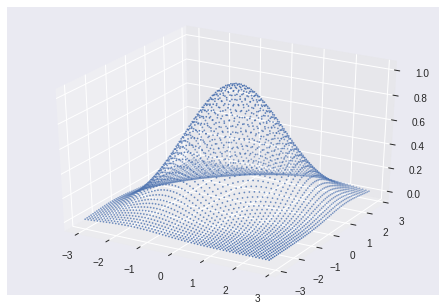

In [27]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

def range_ex(start,end,step):
  while start+step<end:
    yield start
    start+=step
    
def P(x1,x2,b):
  return np.exp(-1/2*(x1**2-2*b*x1*x2+x2**2))

xs=[]
ys=[]
zs=[]
b=0.5

for i in range_ex(-3,3,0.1):
  for j in range_ex(-3,3,0.1):
    xs.append(i)
    ys.append(j)
    zs.append(P(i,j,b))
    
ax=Axes3D(plt.figure())
ax.scatter3D(xs,ys,zs,s=3,edgecolor='None')
plt.show()

Accept ratio: 0.5594


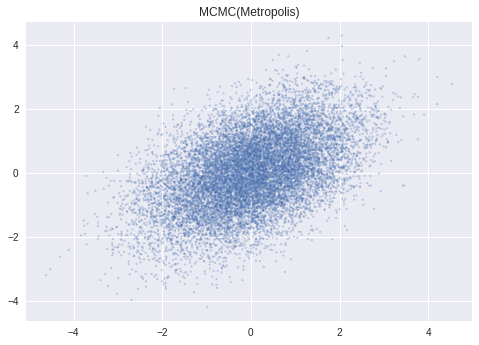

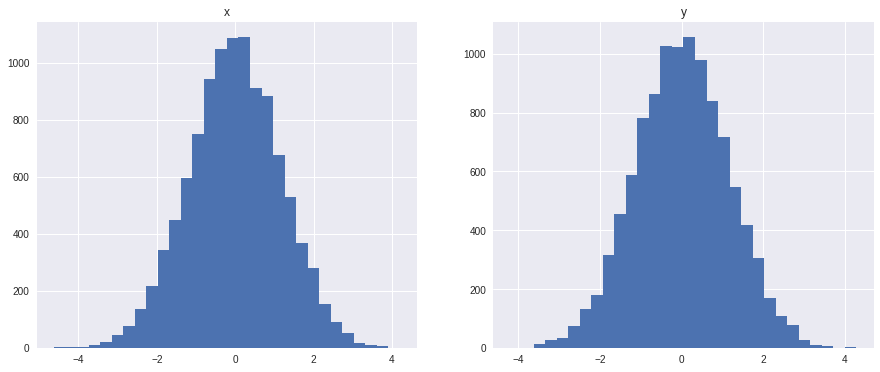

x : 0.03246917662860984 1.3808029823320136
y : 0.045517525138652246 1.3415819523254333


In [1]:
#Metropolis
import copy
import numpy as np
from matplotlib import pyplot as plt

def P(x1,x2,b):
  return np.exp(-0.5*(x1**2-2*b*x1*x2+x2**2))
def Q(c,mu1,mu2,sigma):
  return (c[0]+np.random.normal(mu1,sigma),c[1]+np.random.normal(mu2,sigma))
def metropolis(N):
  current=(10,10)
  sample=[]
  sample.append(current)
  accept_ratio=[]
  for i in range(N):
    candidate=Q(current,mu1,mu2,sigma)
    T_prev=P(current[0],current[1],b)
    T_next=P(candidate[0],candidate[1],b)
    a=T_next/T_prev
    
    if a>1 or a>np.random.uniform(0,1):
      current=copy.copy(candidate)
      sample.append(current)
      accept_ratio.append(i)
      
  print('Accept ratio:', float(len(accept_ratio))/N)
  return np.array(sample)

b=0.5
mu1=0
mu2=0
sigma=1
N=30000
burn_in=0.2

sample=metropolis(N)

plt.scatter(
  sample[int(len(sample)*burn_in):,0],
  sample[int(len(sample)*burn_in):,1],
  alpha=0.3,
  s=5,
  edgecolor='None'
)
plt.title('MCMC(Metropolis)')
plt.show()
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(121)
plt.hist(sample[int(N*burn_in):,0],bins=30)
plt.title('x')
ax=fig.add_subplot(122)
plt.hist(sample[int(N*burn_in):,1],bins=30)
plt.title('y')
plt.show()

print('x :',np.mean(sample[:,0]),np.var(sample[:,0]))
print('y :',np.mean(sample[:,1]),np.var(sample[:,1]))
